In [63]:
import sympy as sp
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
from pylab import *
from scipy.integrate import odeint

### Task 1 Valeria Semenova

In [64]:
t = sp.symbols('t')

x_t = (32/3)*sp.exp(-5*t) - (2/3)*sp.exp(2*t) + 2
y_t = (32/3)*sp.exp(-5*t) + (4/3)*sp.exp(2*t) + 3

x_initial = x_t.subs(t, 0)
y_initial = y_t.subs(t, 0)

print(f"x(0) = 12 is met: {x_initial == 12}")
print(f"y(0) = 15 is met: {y_initial == 15}")

x(0) = 12 is met: True
y(0) = 15 is met: True


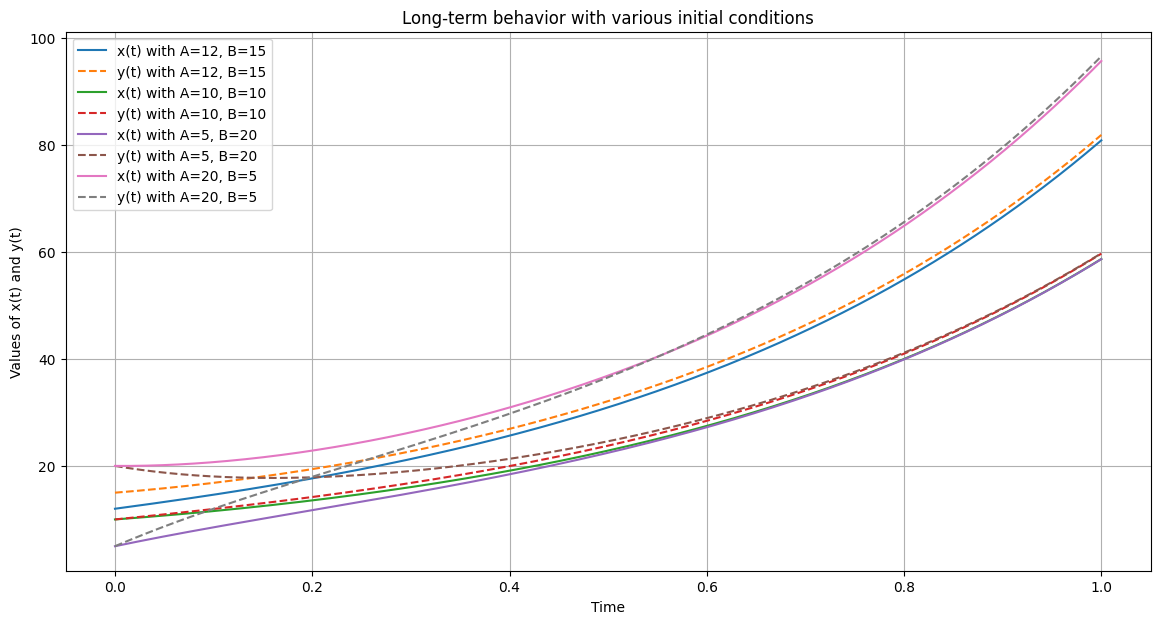

In [65]:
def x_t_general(t, C, D):
    return C * np.exp(-5*t) + D*np.exp(2*t) + 2

def y_t_general(t, C, D):
    return -2*C * np.exp(-5*t) + D*np.exp(2*t) + 3

initial_conditions = [
    (12, 15),
    (10, 10),
    (5, 20),
    (20, 5)
]

t_values = np.linspace(0, 1, 500)

plt.figure(figsize=(14, 7))

for A_value, B_value in initial_conditions:
    C_value = (A_value - B_value + 1) / 3
    D_value = (2*A_value + B_value - 7) / 3

    x_values = x_t_general(t_values, C_value, D_value)
    y_values = y_t_general(t_values, C_value, D_value)

    plt.plot(t_values, x_values, label=f'x(t) with A={A_value}, B={B_value}')
    plt.plot(t_values, y_values, label=f'y(t) with A={A_value}, B={B_value}', linestyle='--')

plt.title('Long-term behavior with various initial conditions')
plt.xlabel('Time')
plt.ylabel('Values of x(t) and y(t)')
plt.legend()
plt.grid(True)
plt.show()

### Task 2 Valeria Semenova

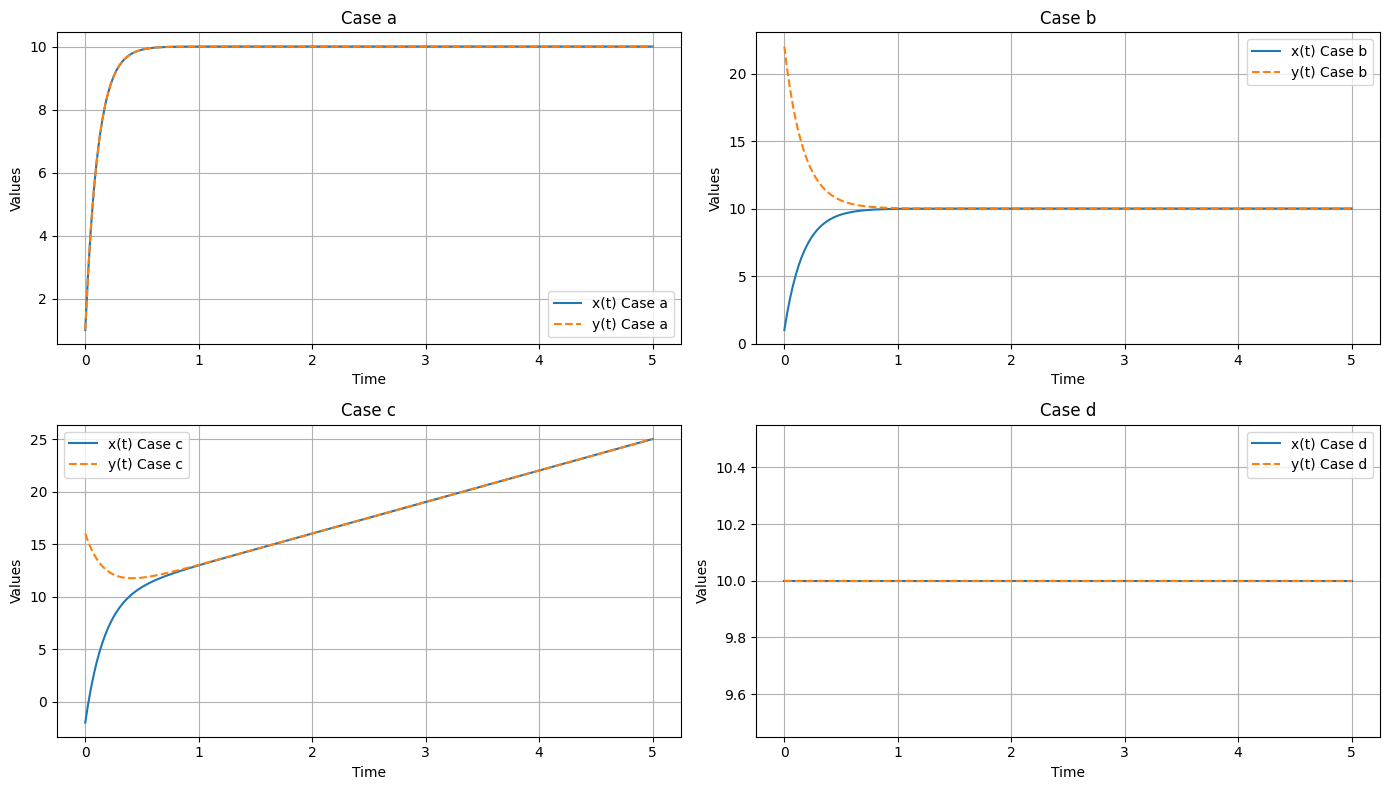

In [66]:
t = sp.symbols('t')

solutions = [
    {'x_t': 10 - 9*sp.exp(-9*t), 'y_t': 10 - 9*sp.exp(-9*t)},  # Case (a)
    {'x_t': 10 - 9*sp.exp(-6*t), 'y_t': 10 + 12*sp.exp(-6*t)},  # Case (b)
    {'x_t': 10 - 12*sp.exp(-6*t) + 3*t, 'y_t': 10 + 6*sp.exp(-6*t) + 3*t},  # Case (c)
    {'x_t': 10, 'y_t': 10}  # Case (d)
]

t_values = np.linspace(0, 5, 200)

plt.figure(figsize=(14, 8))

for i, sol in enumerate(solutions, start=1):
    if isinstance(sol['x_t'], (sp.Number, int, float)):
        x_values = np.full(shape=(len(t_values),), fill_value=float(sol['x_t']))
    else:
        x_t_func = sp.lambdify(t, sol['x_t'], modules=['numpy'])
        x_values = x_t_func(t_values)

    if isinstance(sol['y_t'], (sp.Number, int, float)):
        y_values = np.full(shape=(len(t_values),), fill_value=float(sol['y_t']))
    else:
        y_t_func = sp.lambdify(t, sol['y_t'], modules=['numpy'])
        y_values = y_t_func(t_values)

    # Plot the solutions
    plt.subplot(2, 2, i)
    plt.plot(t_values, x_values, label=f'x(t) Case {chr(96+i)}')
    plt.plot(t_values, y_values, label=f'y(t) Case {chr(96+i)}', linestyle='--')
    plt.title(f'Case {chr(96+i)}')
    plt.xlabel('Time')
    plt.ylabel('Values')
    plt.legend()
    plt.grid(True)

plt.tight_layout()
plt.show()

### Task 3 by Valeria Semenova

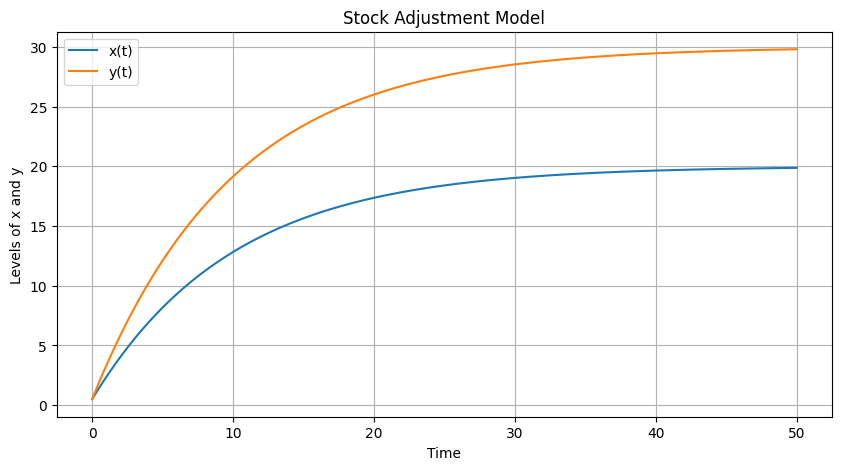

In [67]:
a = 0.1 
b = 0.1 
x_star = 20 
y_star = 30 

def system(dydt, t, a, b, x_star, y_star):
    x, y = dydt
    dxdt = a * (x_star - x)
    dydt = b * (y_star - y)
    return [dxdt, dydt]

x0 = 0.5
y0 = 0.5
initial_conditions = [x0, y0]

t = np.linspace(0, 50, 2000)

solution = odeint(system, initial_conditions, t, args=(a, b, x_star, y_star))

x_solution = solution[:, 0]
y_solution = solution[:, 1]

plt.figure(figsize=(10, 5))
plt.plot(t, x_solution, label='x(t)')
plt.plot(t, y_solution, label='y(t)')
plt.title('Stock Adjustment Model')
plt.xlabel('Time')
plt.ylabel('Levels of x and y')
plt.legend()
plt.grid(True)
plt.show()

For part (b), we are generalizing the stock adjustment model to include the influence of the opposing country's armament level on each country's desired armament level.

In [68]:
t = sp.symbols('t')
x, y = sp.Function('x')(t), sp.Function('y')(t)

# Define the constants
a, b, c, d, e, f = sp.symbols('a b c d e f', positive=True)

# Define x* and y* according to the new model
x_star = c + d * y
y_star = e + f * x

# Define the system of differential equations
dx_dt = a * (x_star - x)
dy_dt = b * (y_star - y)

# Substitute x* and y* into the differential equations
dx_dt_sub = dx_dt.subs(x_star, c + d * y)
dy_dt_sub = dy_dt.subs(y_star, e + f * x)

# Simplify the differential equations
simplified_dx_dt = sp.simplify(dx_dt_sub)
simplified_dy_dt = sp.simplify(dy_dt_sub)

# Print the simplified differential equations
print('Simplified dx/dt:', simplified_dx_dt)
print('Simplified dy/dt:', simplified_dy_dt)

Simplified dx/dt: a*(c + d*y(t) - x(t))
Simplified dy/dt: b*(e + f*x(t) - y(t))


### Task 4-5 by Suhrob Munavarov

In [69]:
'''
-mx: represents increasing military spending at ever higher levels 
-ny: represents increasing military spending at ever higher levels 

a: is positive constant
b: is positive constant
m: is positive constant
n: is positive constant

r: is historical constant reflecting the respective hostility, can be + or -
   + value for r correspond to underlying factor of ill will or distrust that would persist even if arms expenditures dropped to zero
   - value for r indicates a contribution based on goodwill

s: is historical constant reflecting the respective hostility, can be positive or negative
   + value for s correspond to underlying factor of ill will or distrust that would persist even if arms expenditures dropped to zero
   - value for s indicates a contribution based on goodwill

the constants a and b measure mutual fear
the constants m and n represent proportionality factors for the “internal brakes” to further arms increases

'''

'\n-mx: represents increasing military spending at ever higher levels \n-ny: represents increasing military spending at ever higher levels \n\na: is positive constant\nb: is positive constant\nm: is positive constant\nn: is positive constant\n\nr: is historical constant reflecting the respective hostility, can be + or -\n   + value for r correspond to underlying factor of ill will or distrust that would persist even if arms expenditures dropped to zero\n   - value for r indicates a contribution based on goodwill\n\ns: is historical constant reflecting the respective hostility, can be positive or negative\n   + value for s correspond to underlying factor of ill will or distrust that would persist even if arms expenditures dropped to zero\n   - value for s indicates a contribution based on goodwill\n\nthe constants a and b measure mutual fear\nthe constants m and n represent proportionality factors for the “internal brakes” to further arms increases\n\n'

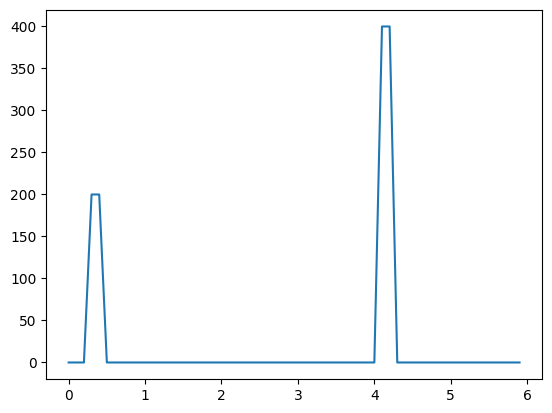

In [70]:
''' setting model parameters' values '''

c12, c13 = 2, 2  # fear factor for country one
c21, c23 = 2, 2  # fear factor for country two
c31, c32 = 2, 2  # fear factor for country three

c11 = 1  # restraint factor for country one
c22 = 1  # restraint factor for country two
c33 = 1  # restraint factor for country three

e1 = -5 
e2 = -5
e3 = +5

''' initial values ''' 
c1_0 = +10   # initial weapons held by country one
c2_0 = +10   # initial weapons held by country two
c3_0 = +10   # initial weapons held by country three


''' bundle parameters for ODE solver '''
params = [c12, c13, c21, c23, c31, c32, c11, c22, c33, e1, e2, e3]

''' bundle initial conditions for ODE solver '''
y0 = [c1_0, c2_0, c3_0]


''' make time array '''
tStop = 6
tInc = 0.1
t = np.arange(0., tStop, tInc)
len(t)

def g(t_0):
    return(((t > t_0)*(t < t_0 + 0.25)))

plt.plot(t, 200 * (g(0.2)) + 400 * g(4))

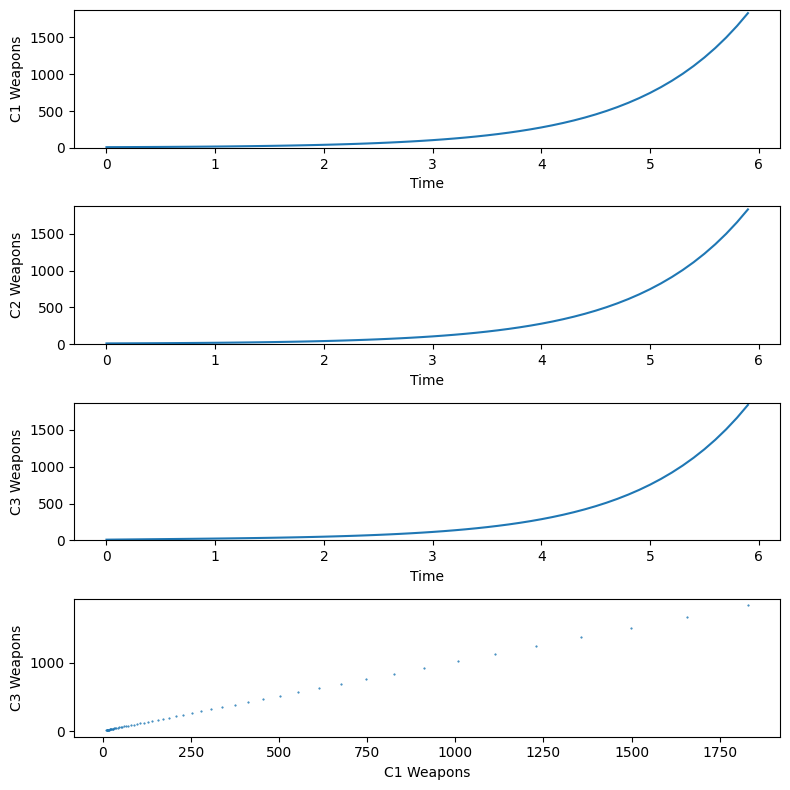

In [71]:
def f(y, t, params):

    c1_0, c2_0, c3_0 = y
    c12, c13, c21, c23, c31, c32, c11, c22, c33, e1, e2, e3 = params
    
    t_0 = 10
    t_1 = 11

    derivs = [ (c12*c2_0 - c11*c1_0 + e1) + (2*(t > t_0)*(t < t_0+0.5)) + (3*(t > t_1)*(t < t_1+0.5)),
               (c21*c1_0 - c22*c2_0 + e2) + (1*(t > t_0)*(t < t_0+0.5)) + (1*(t > t_1)*(t < t_1+0.5)),
               (c31*c2_0 - c33*c3_0 + e3) + 0,
             ]

    return derivs



''' solving '''
psoln = odeint(f, y0, t, args=(params,), rtol=1e-10, hmax = 0.01, tcrit = 5)

''' plotting results '''
fig = plt.figure(1, figsize=(8,8))

# Plot C1 Weapons as a function of time
ax1 = fig.add_subplot(411)
ax1.plot(t, psoln[:,0])
ax1.set_xlabel('Time')
ax1.set_ylabel('C1 Weapons')
ax1.set_ylim(-1, max(psoln[:,0])+ math.sqrt(max(psoln[:,0])) )

# Plot C2 Weapons as a function of time
ax2 = fig.add_subplot(412)
ax2.plot(t, psoln[:,1])
ax2.set_xlabel('Time')
ax2.set_ylabel('C2 Weapons')
ax2.set_ylim(-1, max(psoln[:,0])+ math.sqrt(max(psoln[:,1])) )

# Plot C2 Weapons as a function of time
ax2 = fig.add_subplot(413)
ax2.plot(t, psoln[:,2])
ax2.set_xlabel('Time')
ax2.set_ylabel('C3 Weapons')
ax2.set_ylim(-1, max(psoln[:,0])+ math.sqrt(max(psoln[:,2])) )


# Plot phase-space: C1 Weapons vs C3 Weapons
ax3 = fig.add_subplot(414)
ax3.plot(psoln[:,0], psoln[:,2], '.', ms=1)
ax3.set_xlabel('C1 Weapons')
ax3.set_ylabel('C3 Weapons')

plt.tight_layout()
plt.show()

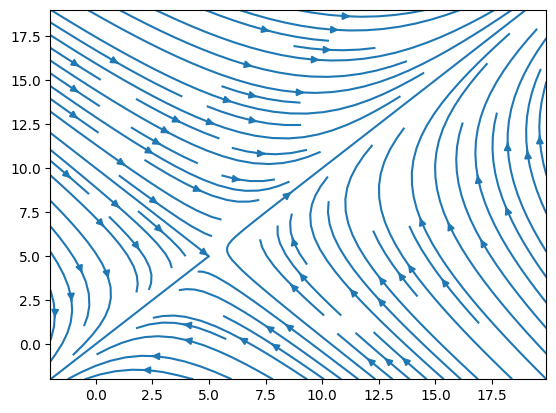

In [72]:


x, y = meshgrid(arange(-2, 20, .1), arange(-2, 20, 1))

xdot = -c11*x + c12*y + e1
ydot = c21*x - c22*y + e2

plt.figure()
plt.streamplot(x, y, xdot, ydot)

x=linspace(-2, 20, 110)
y=linspace(-2, 20, 110)

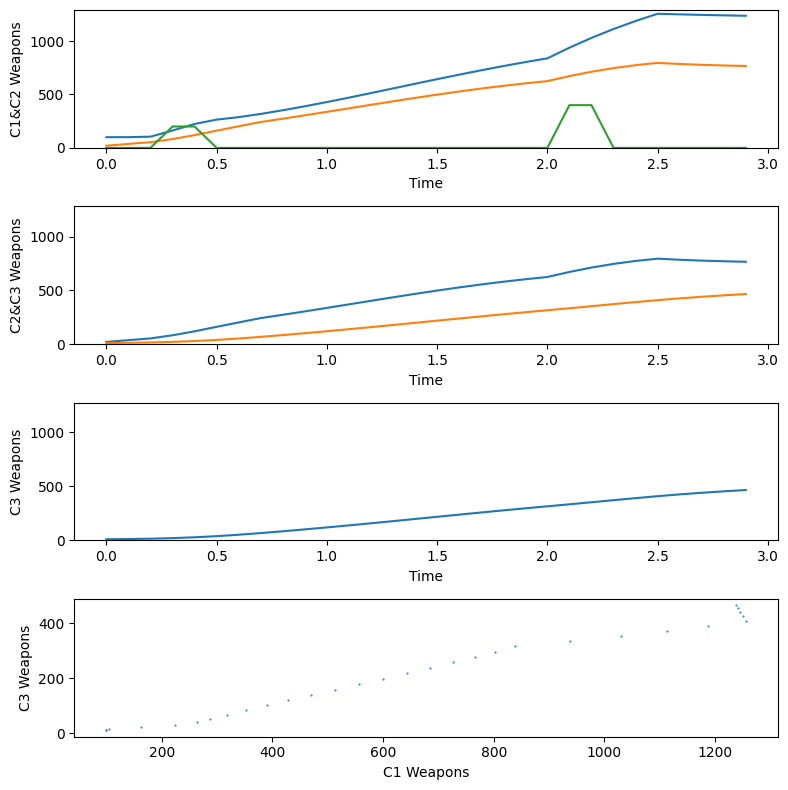

In [73]:
''' setting model parameters' values '''

c12, c13 = 3, 3  # fear factor for country one
c21, c23 = 2, 2  # fear factor for country two
c31, c32 = 1, 1  # fear factor for country three

c11 = 0.9  # restraint factor for country one
c22 = 0.78  # restraint factor for country two
c33 = 1  # restraint factor for country three

e1 = 6
e2 = 0.3
e3 = 4

''' initial values ''' 
c1_0 = +100   # initial weapons held by country one
c2_0 = +20  # initial weapons held by country two
c3_0 = +10   # initial weapons held by country three


''' bundle parameters for ODE solver '''
params = [c12, c13, c21, c23, c31, c32, c11, c22, c33, e1, e2, e3]

''' bundle initial conditions for ODE solver '''
y0 = [c1_0, c2_0, c3_0]


''' make time array '''
tStop = 3
tInc = 0.1
t = np.arange(0., tStop, tInc)
len(t)

def g(t_0):
    return(((t > t_0)*(t < t_0+0.25)))

k = 200*(g(0.2)) + (400*g(2))
def f(y, t, params):
    c1_0, c2_0, c3_0 = y
    c12, c13, c21, c23, c31, c32, c11, c22, c33, e1, e2, e3 = params

    t_0 = 0.2
    t_1 = 0.3
    t_2 = 2
    t_3 = 4.5
    t_4 = 6

    (t_5, t_6, t_7, t_8) = (1, 1.3, 2, 2.3)

    derivs = [((1-(c1_0/1200)) * (c12*c2_0 - c11*c1_0 + e1)) + (500*(t > t_0)*(t < t_0+0.25)) + (700*(t > t_2)*(t < t_2+0.5)),       
              ((1-(c2_0/750))  * (c21*c1_0 - c22*c2_0 + e2)) + (100*(t > t_0)*(t < t_0+0.5)) + (300*(t > t_2)*(t < t_2+0.5)),
              ((1-(c3_0/750))  * (c31*c2_0 - c33*c3_0 + e3)) + 0            
             ]

    return derivs



''' solving '''
psoln = odeint(f, y0, t, args=(params,), hmax = 0.01, tcrit = 5)
''' plotting results '''
fig = plt.figure(1, figsize=(8,8))

# Plot C1 Weapons as a function of time
ax1 = fig.add_subplot(411)
ax1.plot(t, psoln[:,0])
ax1.plot(t, psoln[:,1])
ax1.plot(t, k)
ax1.set_xlabel('Time')
ax1.set_ylabel('C1&C2 Weapons')
ax1.set_ylim(-1, max(psoln[:,0])+ math.sqrt(max(psoln[:,0])) )

# Plot C2 Weapons as a function of time
ax2 = fig.add_subplot(412)
ax2.plot(t, psoln[:,1])
ax2.plot(t, psoln[:,2])
ax2.set_xlabel('Time')
ax2.set_ylabel('C2&C3 Weapons')
ax2.set_ylim(-1, max(psoln[:,0])+ math.sqrt(max(psoln[:,1])) )

# Plot C2 Weapons as a function of time
ax2 = fig.add_subplot(413)
ax2.plot(t, psoln[:,2])
ax2.set_xlabel('Time')
ax2.set_ylabel('C3 Weapons')
ax2.set_ylim(-1, max(psoln[:,0])+ math.sqrt(max(psoln[:,2])) )


# Plot phase-space: C1 Weapons vs C3 Weapons
ax3 = fig.add_subplot(414)
ax3.plot(psoln[:,0], psoln[:,2], '.', ms=1)
ax3.set_xlabel('C1 Weapons')
ax3.set_ylabel('C3 Weapons')

plt.tight_layout()
plt.show()